# KNN

Es un algoritmo no paramétrico de regresión y clasificación. Donde según el fin, el output tiene cierta característica:

1. clasificación: El resultado es una pertenencia a una clase. Un objeto se clasifica mediante el voto de la pluralidad de sus vecinos, asignándose el objeto a la clase más común entre sus vecinos.

2. Regresión: la salida es el valor de propiedad del objeto. Este valor es el promedio de los valores de k vecinos más cercanos.

## KNN - Regression

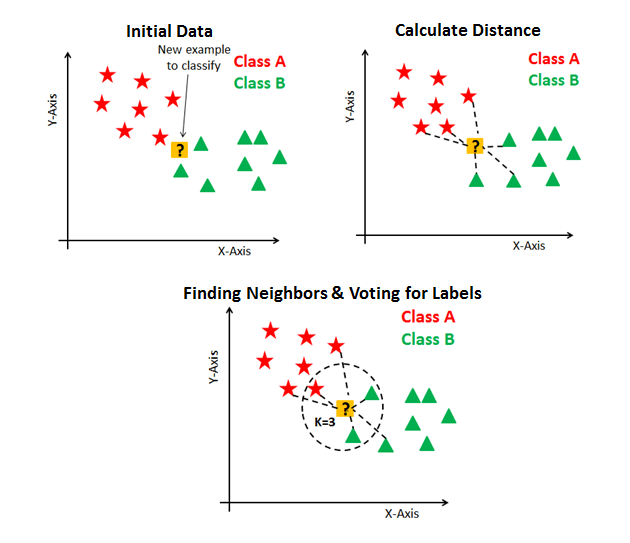

### Ventajas 

1. No asume relación entre variables.
2. Algoritmo de aprendizaje perezoso.
3. Aplicaciones: Recomendación y búsqueda de similitud.

### Desventajas  

1. Sensible al valor de K.
2. Sensible a outlier.
3. No recomendable para dimensiones altas.

**Datos importantes**

1. Se puede configurar la métrica de distancia de los vecinos.
2. Se puede asignar mayor peso a los vecinos mas cercanos.

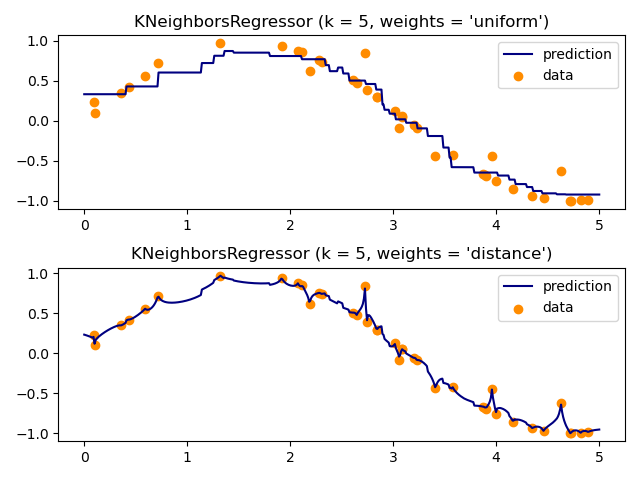

## Implementación 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

Carga del dataset

Se busca un modelo sin mayor pre procesamiento, solo explicativo.

In [2]:
base = load_boston()
base_x=pd.DataFrame(base.data, columns= base.feature_names)
base_y=pd.DataFrame(base.target, columns=['MEDV'])

In [3]:
print(base_x.shape)
base_x.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Definición de variables:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

LSTAT: % lower status of the population

MEDV(target): Median value of owner-occupied homes in $1000’s

**Estandarizamos las variables**

In [4]:
columns= base_x.columns.to_list()
scaler = MinMaxScaler()
base_x = pd.DataFrame(scaler.fit_transform(base_x),columns=columns)
base_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [5]:
base_x.describe()     

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Implementación del modelo 

División del dataset en entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(base_x, base_y, test_size=0.3, random_state=21)

In [7]:
#5 vecinos,"distance" permite que haya mayor ponderación a los vecinasmás próxios.
modelo_1 = KNeighborsRegressor(n_neighbors=5, weights='distance')
modelo_1.fit(X_train, y_train)
prediccion_1= modelo_1.predict(X_test)

Veamos que tan bien ajustó el modelo

In [8]:
print("Mean squared error: " ,mean_squared_error(y_test, prediccion_1))
print('r2 score:', r2_score(y_test, prediccion_1))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, prediccion_1)))

Mean squared error:  25.783696942493947
r2 score: 0.7303602361494357
RMSE:  5.0777649554202435


**¿Será el "k" óptimo?**

Hay algunas maneras de encontrar los mejores hiperparámetros, veamos:

In [9]:
vector_rmse=[]
for k in range(1,10):
    model_bucle=KNeighborsRegressor(n_neighbors=k, weights='distance')
    model_bucle.fit(X_train,y_train)
    prediccion_bucle=model_bucle.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test,prediccion_bucle))
    vector_rmse.append(error)
    print("Para ",k," vecinos, el error es: ",error)

Para  1  vecinos, el error es:  4.499122721504482
Para  2  vecinos, el error es:  4.398009480870337
Para  3  vecinos, el error es:  4.627936435601044
Para  4  vecinos, el error es:  4.9121754192069575
Para  5  vecinos, el error es:  5.0777649554202435
Para  6  vecinos, el error es:  5.199885524886536
Para  7  vecinos, el error es:  5.335659668371585
Para  8  vecinos, el error es:  5.432861897814187
Para  9  vecinos, el error es:  5.542810102550875


Text(0.5, 1.0, 'K vecinos vs RMSE')

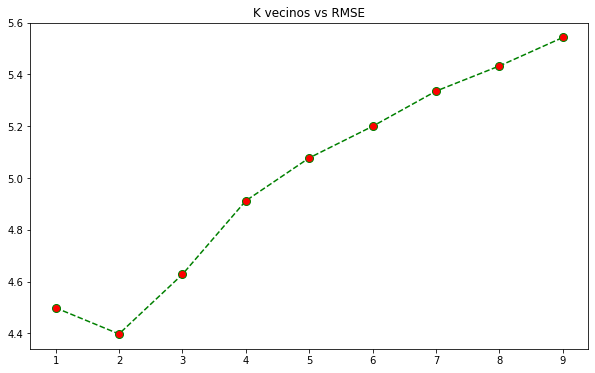

In [10]:
plt.figure(figsize=(10,6))
plt.plot([1,2,3,4,5,6,7,8,9],vector_rmse, color='green', linestyle='dashed',marker='o', markerfacecolor='red', markersize=8)
plt.title("K vecinos vs RMSE")

In [11]:
modelo_2 = KNeighborsRegressor(n_neighbors=2, weights='distance') #2 vecinos
modelo_2.fit(X_train, y_train)
prediccion_2= modelo_2.predict(X_test)

In [12]:
print("Mean squared error: " ,mean_squared_error(y_test, prediccion_2))
print('r2 score:', r2_score(y_test, prediccion_2))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, prediccion_2)))

Mean squared error:  19.342487393825373
r2 score: 0.79772087203841
RMSE:  4.398009480870337


¿Otra manera para obtener el valor de $k$ óptimo?

Introducimos la noción de Cross validation (validación cruzado). En esencia es coger un subconjunto de datos para el cálculo del modelo, ese servirá de entrenamioento y el complemento se usa para validación.

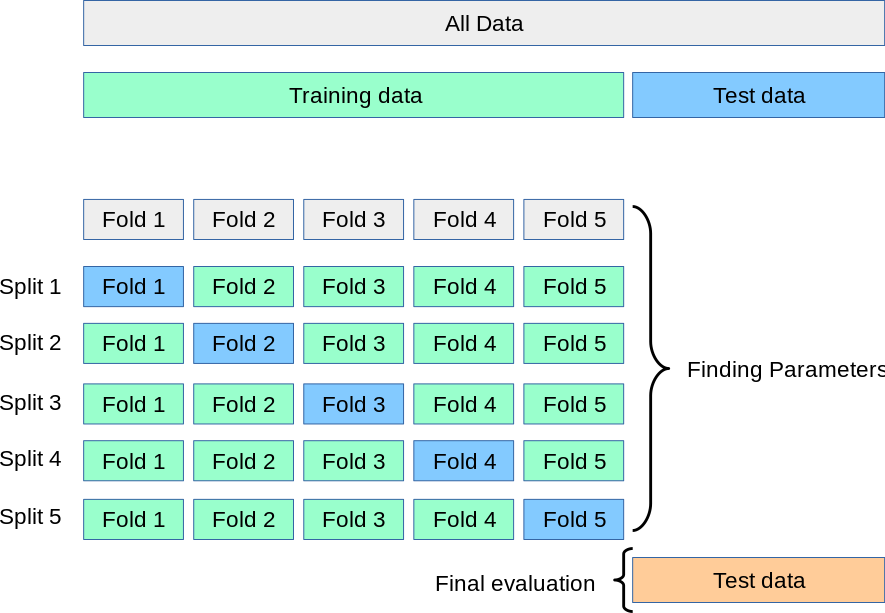

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

configuremos lo hiperparametros a calcular

In [13]:
param={'n_neighbors':[1,2,3,4,5,6,7,8,9],'weights':['uniform','distance']}

In [14]:
knn=KNeighborsRegressor()
modelo_3=GridSearchCV(knn, param_grid=param, cv=5) # Para el cross validation se usará 5 particiones
modelo_3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [15]:
modelo_3.best_estimator_

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [16]:
modelo_3.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [17]:
modelo_4 = KNeighborsRegressor(n_neighbors=3, weights='distance') #5 vecinos
modelo_4.fit(X_train, y_train)
prediccion_4= modelo_4.predict(X_test)

In [18]:
print("Mean squared error: " ,mean_squared_error(y_test, prediccion_4))
print('r2 score:', r2_score(y_test, prediccion_4))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test, prediccion_4)))

Mean squared error:  21.417795651963694
r2 score: 0.7760177923796008
RMSE:  4.627936435601044


Consolidemos resultados

In [19]:
MSE_m1=mean_squared_error(y_test, prediccion_1)
RMSE_m1=np.sqrt(mean_squared_error(y_test, prediccion_1))
R2_score_m1=r2_score(y_test, prediccion_1)
###
MSE_m2=mean_squared_error(y_test, prediccion_2)
RMSE_m2=np.sqrt(mean_squared_error(y_test, prediccion_2))
R2_score_m2=r2_score(y_test, prediccion_2)
###
MSE_m4_1=mean_squared_error(y_test, prediccion_4)
RMSE_m4_1=np.sqrt(mean_squared_error(y_test, prediccion_4))
R2_score_m4_1=r2_score(y_test, prediccion_4)

In [20]:
Tabla=pd.DataFrame({"Modelo":["Modelo 1","Modelo 2","Modelo 3"],
                    "K":[5,2,3],
                    "# Variable":[13,13,13],"MSE":[MSE_m1,MSE_m2,MSE_m4_1],
                    "RMSE":[RMSE_m1,RMSE_m2,RMSE_m4_1],
                    "R2 Score":[R2_score_m1,R2_score_m2,R2_score_m4_1]})
Tabla

,Modelo,K,# Variable,MSE,RMSE,R2 Score
0,Modelo 1,5,13,25.783697,5.077765,0.730360
1,Modelo 2,2,13,19.342487,4.398009,0.797721
2,Modelo 3,3,13,21.417796,4.627936,0.776018


¿Será correcto quedarnos con el modelo de 2 vecinos por que tienen mejor RMSE?

¿pueden armar un código que te disminuya la cantidad de variables tal que el error sea menor?

### Links de información 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor

https://scikit-learn.org/stable/modules/neighbors.html#regression

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

http://web.tecnico.ulisboa.pt/andreas.wichert/8_NN.pdf

https://www.youtube.com/watch?v=JtYCrzGdRLo&t=25s

https://bo.wiki2.wiki/wiki/k-nearest_neighbors_algorithm

https://www.merkleinc.com/es/es/blog/algoritmo-knn-modelado-datos